In [ ]:
import sys, os
sys.path.insert(0, os.path.join(os.getcwd(), "scripts/analysis/autoencoders"))

In [9]:
import torch
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
import convolutional

In [3]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import torchvision.transforms.functional as TF
from PIL import Image
from pathlib import Path

In [4]:
img_fps = Path("intermediary/split_data").glob("*/*.png")
imgs = [Image.open(fp) for fp in img_fps]

In [20]:
def preprocess(img):
    bg_color = (244,244,244)
    resize_to = (1024, 1024)
    height, width = img.size
    
    img = img.rotate(random.randint(0,180), fillcolor=bg_color)
    img_padded = Image.new(img.mode, (3000, 3000), bg_color)
    img_padded.paste(img, (1500-height//2, 1500-width//2))
    img_padded.thumbnail(resize_to, Image.ANTIALIAS)
    
    tsfms = transforms.Compose([
        transforms.Grayscale(),
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomVerticalFlip(0.5),
        transforms.ToTensor(),
    ])
    
    return tsfms(img_padded)

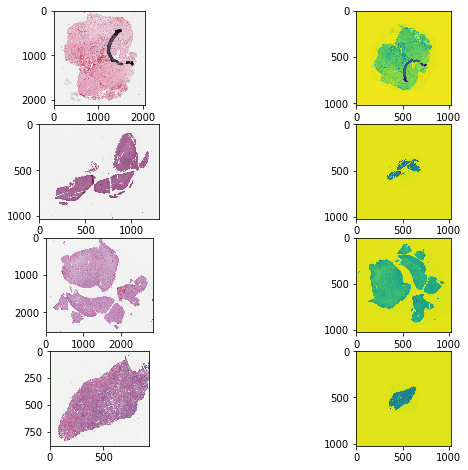

In [21]:
n_examples = 4
f, axes = plt.subplots(n_examples, 2)
for i, img in enumerate(itertools.islice(imgs, n_examples)):
    axes[i, 0].imshow(img)
    axes[i, 1].imshow(preprocess(img)[0,:,:])
    
f.set_size_inches(2.5*n_examples, 8)